# Visualization

### 1D Function Plot
A 1D function consists of a dependent variable and an independent variable. The function can be plotted on a 2D plane where each point corresponds to the ordered pair (x,f(x)).

For example: $y=f(x)=x^2, [-2,2]$ <br>
Some of the points satisfying this function are {(-2,4),(-1,1),(0,0),(1,1),(2,4)}<br>
It can be plotted as follows.

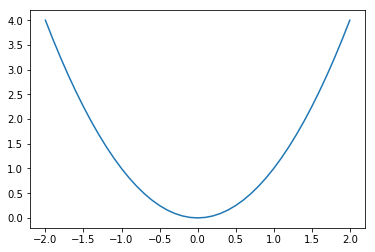

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(41)/10-2
y=x**2
plt.plot(x,y)

### 2D function plot on a plane
To plot a 2D function you will primarily need to import the matplotlib library.
"meshgrid" is a function that allows creating the coordinates for a mesh. Explore shape and values of X, and Y, and compare it with Z1, as a first exercise.
Many functions are implemented into the submodule "mlab" that reproduces many functions that already exist in Matlab and with which many students are familiar. 


In [14]:
x=np.arange(-1.0,1.0,0.1) #a one dimensional array
y=np.arange(-2.0,2.0,0.1) #a one dimensional array
X,Y=np.meshgrid(x,y)      # creates a 2D array
print(X[5,5],Y[5,5]) #accessing the elements of the meshgrid in the form of ordered paris (x,y)

-0.5000000000000001 -1.4999999999999996


<img style=" align:center; display:inline" src="figures/gridd1.jpg" width="200" height="400" alt="grid" /><br/>
<img style=" align:center; display:inline" src="figures/gridd2.jpg" width="200" height="400" alt="grid" /><br/>
<img style=" align:center; display:inline" src="figures/gridd.jpg" width="200" height="400" alt="grid" /><br/>
Forming a rectrangular grid using 'meshgrid' command

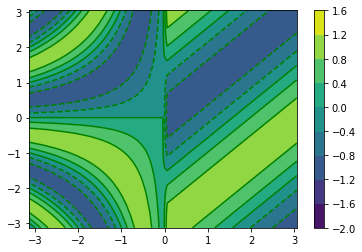

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = y = np.arange(-np.pi, np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z1 = np.sin(X*Y)
Z1[X>0]=0.
Z2 = np.cos(X-Y)
Z2[X<0]=0.
Z = (Z1 - Z2)
#CS = plt.contourf(X, Y, Z)
#CS = plt.contourf(X, Y, Z); plt.colorbar(CS)
levels = np.arange(-2.0,2.0,0.4)
CS = plt.contourf(X, Y, Z, levels)
CS4 = plt.contour(X, Y, Z, levels, colors='g')
plt.colorbar(CS)
#plt.clabel(CS4, colors='k', fontsize=16)
plt.savefig('gabriele.png')
plt.show()

### 2D Function Plot on a 3D Surface
The 2D function can also be visualized on a 3D surface. The X and Y axes denote the independent variables whereas the Z axis represent the value of the function for that value of X and Y. Let us visualize the above graph in 3D surface.

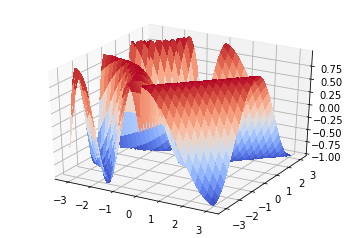

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

### Example: Plotting over a global map
It is possible to plot any function over a sphere.
In Geodynamics we often want to map our numerical models on the Earth surface,
or plot our data on a physical Map. Aimed at doing this MatplotLib has a specific
module called mpl_toolkits.basemap. This can be installed, e.g., in Anaconda with the
command conda install basemap. Let us first create a very simple projection of a map
on a sphere of a simple function (decays exponentially toward the poles, oscillated
like a wave with the longitude). First we load the module, create the coastlines, color
the continents versus the oceans and plot the latitude and longitude:

/home/gxm1647/anacondaNew/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


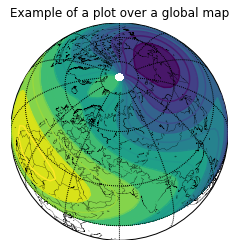

In [114]:
import mpl_toolkits.basemap as bm
import matplotlib.pyplot as plt
import numpy as np

# Let us set our view above Eurasia. And use low resolution. 
myMap =bm.Basemap(projection='ortho',lat_0=60,lon_0=60,resolution='l')

# draw coastlines, countries and continents.
myMap.drawcoastlines(linewidth=0.25)
myMap.drawcountries(linewidth=0.25)
#myMap.fillcontinents(color='orange',lake_color='aqua')

# draw the edge of the map, the meridians and the parallels
#myMap.drawmapboundary(fill_color='aqua')
myMap.drawmeridians(np.arange(0,360,30))
myMap.drawparallels(np.arange(-90,90,30))

# make up some data on a regular lat/lon grid.
n = 100; d = 2*np.pi/(n-1)
[lats,lons] = d*np.indices((n,n))
wave = np.exp(-lats/10) * np.cos(lons)
mean = np.cos(2.*lats) * np.sin(2.*lats)
x, y = myMap(lons*180./np.pi, lats*180./np.pi) #project the lat/lon on the grid
cs = myMap.contourf(x,y,mean+wave) #project a contour plot on,the map
cs = myMap.contour(x,y,mean+wave,15,linewidths=1.5) #project a contour plot on,the map
plt.title('Example of a plot over a global map')
plt.show()

### NetCDF and ETOPO

In the next example, I will use the standard storage system called NetCDF4. NetCDF
stands for Network Common Data Form and it is an interface for storing and retrieving
data in form of arrays, that are the main format of data that we use in our models
and for data representation. To store the data in arrays has numerous advantages that
we will exploit when learning how to use NumPy. Among them that array values
may be accessed directly, ignoring the details of how the data are stored. This means
that netCDF datasets can be only partially accessed and transformed, without locally
storing and managing the entire datasets, which therefore can be very large.
The physical representation of netCDF data is designed to be independent of
the computer on which the data were written. In particular in the version four of
NetCDF the modern data format HDF5 was introduced, allowing unlimited datatypes
and specifically designed for efficiently transmit high volume and complex data.
Examples on how to create, store and retrieve HDF5 data in Python are in https:
//support.hdfgroup.org/HDF5/examples/intro.html#python.
In order to learn to use NetCDF4, dataset let us play with them and plot a public
topography/bathymetry dataset of NOAA. First, we have to access it. For this exercise
you can also download the entire dataset, but it is huge, while the idea of accessing
NetCDF data is to extract only the data that we are interested in. We will use the
database of the software Ferret. In Anaconda, the netCDF library can be installed
with the command conda install netCDF4.

[  0.00000000e+00   8.33341051e-02   1.66668210e-01 ...,   3.59753332e+02
   3.59836666e+02   3.59920000e+02]
[-90.         -89.91666667 -89.83333333 ...,  89.83333333  89.91666667  90.        ]


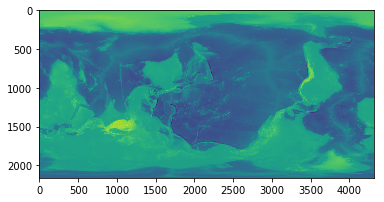

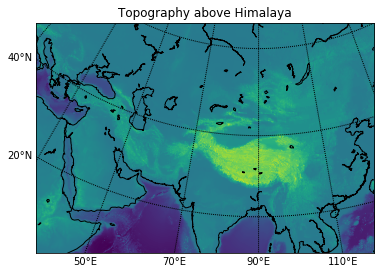

In [4]:
import mpl_toolkits.basemap as bm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
#loading the data and extracting the latitude, longitude and topography
#if this dataset is not available anymore, it can be downloaded from many, sources
#as well as the more recent higher resolution versions
#url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
#url = 'http://ferret.pmel.noaa.gov/pmel/thredds/catalog/data/PMEL/etopo5.nc'
#url='https://github.com/dcherian/tools/blob/master/ROMS/arango/bathymetry/etopo5.nc'
#url='https://github.com/dcherian/tools/raw/master/ROMS/arango/bathymetry/etopo5.nc'
#url='https://www.dropbox.com/s/bnuekeu7giq2msd/etopo5.nc?dl=0'
url = 'http://oos.soest.hawaii.edu/thredds/dodsC/etopo5'
topography = Dataset(url) #extract data using NetCDF
topoin = topography.variables['ROSE'][:]
lons = topography.variables['ETOPO05_X'][:]
lats = topography.variables['ETOPO05_Y'][:]
plt.imshow(topoin)
topoin.shape
print(lons);print(lats)
# ETOPO and basemap are shifted of 180 degrees in longitude, so we need to,shift the reference
topoin,lons = bm.shiftgrid(180.,topoin,lons,start=False)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
m = bm.Basemap(llcrnrlon=40.,llcrnrlat=0., urcrnrlon=140,urcrnrlat=60.,resolution='l',area_thresh=1000., projection='lcc',lat_1=30.,lon_0=90.,ax=ax) #viewpoint from space
n = 1000
nx = 1 + int( (m.xmax-m.xmin)/n )
ny = 1 + int( (m.ymax-m.ymin)/n )
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat)
m.drawcoastlines()
par = np.arange(0.,80.,20.); m.drawparallels(par,labels=[1,0,0,0])
mer = np.arange(10.,360.,20.); m.drawmeridians(mer,labels=[0,0,0,1])
#cb = m.colorbar(im,"right", size="5")
ax.set_title('Topography above Himalaya')
plt.show()


### Example: Plotting a seismic event near Kilauea

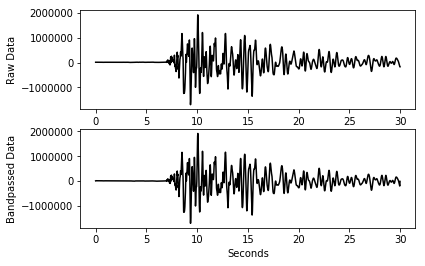

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.signal import freqattributes

# Load the data from the web
Network = "HV"; Station = "WRM"; Location = "--"; Channel = "HHE"
t1 = UTCDateTime("2016-08-24T22:17:50.000")
client = Client("IRIS")
st = client.get_waveforms(Network, Station, Location, Channel, t1, t1 + 30)

# There is only one trace in the Stream object, let’s work on that trace...
tr = st[0]; df=tr.stats.sampling_rate; dD=tr.stats.delta

# Filtering a copy of the original Trace
fMin=0.1; fMax=20
tr_filt = tr.copy()
tr_filt.filter('bandpass', freqmin=fMin, freqmax=fMax, corners=3, zerophase=True)
tr_spec = freqattributes.spectrum(tr_filt.data,df,18001)

# Plottnig raw and filtered data
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211); plt.plot(t, tr.data, 'k'); plt.ylabel('Raw Data')
plt.subplot(212); plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Bandpassed Data'); plt.xlabel('Seconds')
plt.show()

### Example: 3D scatter plotting

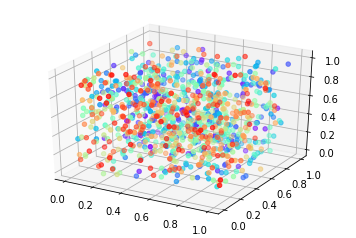

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

n = 1000
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color=cm.rainbow(np.linspace(0,1,n))
xs = np.random.rand(n)
ys = np.random.rand(n)
zs = np.random.rand(n)
ax.scatter(xs, ys, zs, c=color)
plt.show()

250 0.2275215157 1.0 1.25


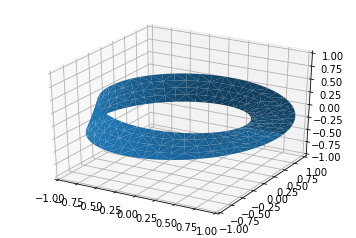

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import tri

n = 50; l = 5
u = np.arange(n)*2*np.pi/(n-1)
u = u * np.ones((l,1))
u = u.reshape(n*l)
v = np.arange(l)/(l-1)-0.5
v = v * np.ones((n,1))
v = v.transpose().reshape(n*l)

#Mobius mapping, (u, v) -> (x, y, z)
x= (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y= (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z= 0.5 * v * np.sin(u / 2.0)

# Create the triangulated surface
surface = tri.Triangulation(u, v)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, triangles=surface.triangles)
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);
plt.show()

To run the cell in which the VTK file is created, one has to first create the x,y,z variables here on top.

In [39]:
def writeVTKSurface(outFileName,x,y,z,triangles):
    nodesNumber=x.size
    trianglesNumber=int(triangles.size/3)
    
    m=open(outFileName,'w')
    m.write('# vtk DataFile Version 2.0\n')
    m.write('Moebius surface\n')
    m.write('ASCII\n')
    m.write('DATASET POLYDATA\n')

    m.write('POINTS'+str(nodesNumber)+ 'float\n')    
    for node in np.arange(nodesNumber):
        m.write(str(x[node])+' '+str(y[node])+' '+str(z[node])+' \n')
    
    m.write('POLYGONS '+str(trianglesNumber)+' '+str(trianglesNumber*4)+'\n')
    for triangle in np.arange(trianglesNumber):
        m.write('3 '+str(triangles[triangle,0])+' '+str(triangles[triangle,1])+' '+str(triangles[triangle,2])+'\n')
    m.close()
    
    return()

#calling this function
writeVTKSurface('moebius.vtk',x,y,z,surface.triangles)   


()

### Example: Length of the Day
The ability to find and process datasets is essential in geophysics. I show here an
example on how to download a dataset from the web (evolution of the Length of
the Day for one year) from an official repository and how to plot these data using
MatPlotLib.
Earth–Moon dynamics, variations of the Earth’s inertial axis, seasonal oscilla-
tions, local tides, and other phenomena make the Earth’s rotation rate slightly vary in
time, causing a fluctuation of the Length of the Day. Present GPS data allow estimat-
ing the Earth’s rotation rate every day, and therefore the Length of the data (LOD)
on a daily bases.
As an example, I illustrate here a plot of a recent dataset from the Interna-
tional Earth Rotation and Reference System Service (www.iers.org). I download
first the raw data from January 2016 that are available at the address
http://datacenter.iers.org/eop/-/somos/5Rgv/latestXL/207/bulletinb-337/csv. Csv is a format for data storage and in our case
it is in ascii, therefore we can simply parse the file to find necessary data.
In Python 3.x the important Module urllib has been introduced, which allows
requesting, downloading and writing a file online, if permitted. We will use this
module to download the data. Generally in csv files the fields are divided by or or
a similar symbol. In our case, a direct inspection of the data file shows that it is the
symbol . Furthermore the first line of the csv file shows the meaning of every field
and that the first field is the day and the Length of the Day is the thirteenth, which
are indexes 0 and 12 in Python.
We will store the cardinal day number and the Length of each Day in the lists day
and LOD. It is important, when reading an unknown file, to allow the possibility that
one line could be not read. This is normally done with the instructions try and except
that control this case and avoid an error that would irremediably stop the execution:

line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable
line not readable


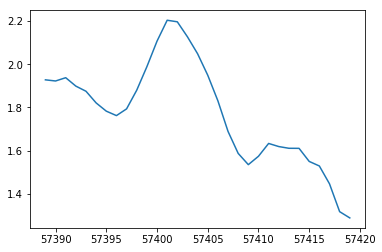

In [17]:
import urllib.parse
import urllib.request
import matplotlib.pyplot as plt

day=[]; LOD=[]
url='http://datacenter.iers.org/eop/-/somos/5Rgv/latestXL/207/bulletinb-337/csv'

with urllib.request.urlopen(url) as response:
    lines = response.read()
    lines=str(lines)
    lines = lines.split('\\n')
    for line in lines:
        words = line.split(';')
        try:
            (thisDay, thisLOD)=( float(words[0]), float(words[12]) )
            day.append(thisDay); LOD.append(thisLOD)
        except:
            print('line not readable')
plt.plot(day,LOD)
plt.show()

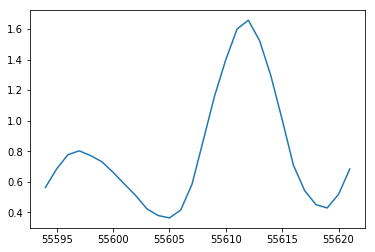

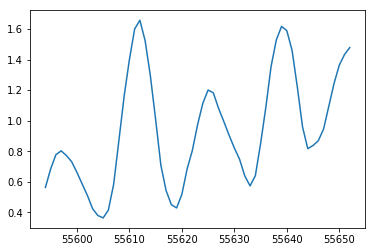

In [7]:
import urllib.parse
import urllib.request
import matplotlib.pyplot as plt
numberOfYears=5
day=[]; LOD=[]
fileNames=[]
url = 'http://datacenter.iers.org/eop/-/somos/5Rgv/latestXL/207/'

for i in range(338-12*numberOfYears, 338, 1):
    fileNames.append('bulletinb-'+str(i))
a=1
for fileName in fileNames:
    with urllib.request.urlopen(url+fileName+'/csv') as response:
        lines = response.read()
        lines=str(lines)
        lines = lines.split('\\n')
        for line in lines:
            words = line.split(';')
            try:
                (thisDay, thisLOD)=( float(words[0]) , float(words[12]) )
                day.append(thisDay); LOD.append(thisLOD)
            except:
                r="nothing"
    if a<3:
        plt.plot(day,LOD)
        plt.show()
    else:
        break
    a=a+1
    

One can similarly create much more complex setup and visualize results. For
example I can create a set of bubbles in space, at random position and of random
size (with certain limits), that has been used for research.
Over there, the mesh was created by recursively subdividing the faces of a regular
polyhedron in 4 parts until the desired resolution is achieved. I show here instead a
simpler approach based on spiraling around a sphere to setup the points of the mesh
and then using the Convex Hull to triangulate the surface

In [8]:
import numpy as np
from scipy.spatial import ConvexHull
samples = 5000
increment = np.pi * ( 3 - 5**0.5 )
points = np.zeros((samples,3))
phi = np.arange(0., samples*increment, increment)
points[:,1] = ( 2. * np.arange(samples) + 1 )/samples - 1.
r = ( 1 - points[:,1]**2)**0.5
points[:,0] = np.cos(phi) * r
points[:,2] = np.sin(phi) * r
hull = ConvexHull(points)

In [11]:
print(hull.points)

[[ 0.019999   -0.9998      0.        ]
 [-0.02553938 -0.9994      0.02339616]
 [ 0.00390882 -0.999      -0.04453898]
 ...
 [-0.01797333  0.999      -0.04093848]
 [ 0.03168923  0.9994      0.01397973]
 [-0.01894466  0.9998      0.00640781]]


### Working with animations
The process of displaying successive images on the same frame in order to give the effect of motion to the viewer is known as animation. Animations are ideal to display the motion of certain objects over time. 

Let us take an example of a square wave on a uniform velocity field and display the time evolution of the wave using animation. 

This graph is a intentionally left blank. We will use it to make animation in the later part of the program


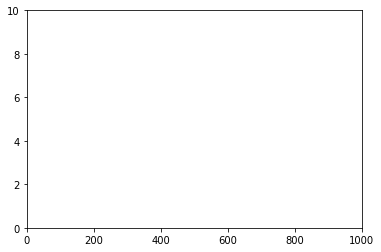

In [2]:
## Code to generate GIF image <source = "http://tiao.io/posts/notebooks/save-matplotlib-animations-as-gifs/">
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

from matplotlib import animation, rc
from IPython.display import HTML
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots();


ax.set_xlim(( 0, 1000));
ax.set_ylim((-0, 10));
line, = ax.plot([], [], lw=2);

def sett(x1,x2,y1,y2):
    ax.set_xlim(( x1,x2));
    ax.set_ylim((y1, y2));
    line, = ax.plot([], [], lw=2);

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i,rho,xx,step):
    x = xx
    rr=step*i
    y = rho[rr]
    sett(xx.min(),xx.max(),rho[rr].min(),rho[rr].max())
    line.set_data(x, y)
    return (line,)
print("This graph is a intentionally left blank. We will use it to make animation in the later part of the program")

In [5]:
spacegrid=1000
timesteps=1000
width=1.0
xx=np.arange(spacegrid)
simulationtime=1.0
velocity=1.0
dt=simulationtime/timestep
dt=simulationtime/timesteps
dt=simulationtime/timesteps
dx=width/spacegrid
veolcitygrid=velocity*np.ones(spacegrid)
zeromatrix=np.zeros((spacegrid),float)
rhoupwind=np.zeros((timesteps,spacegrid+2),float)
rhoupwind[0,30:300]=10
veolcitygrid=velocity*np.ones(spacegrid)
for t in range(timesteps-1):
    aplus=np.maximum(zeromatrix,veolcitygrid)
    aminus=np.minimum(zeromatrix,veolcitygrid)
    rhoplus=(rhoupwind[t,2:]-rhoupwind[t,1:-1])/dx
    rhominus=(rhoupwind[t,1:-1]-rhoupwind[t,:-2])/dx
    rhoupwind[t+1,1:-1]=rhoupwind[t,1:-1]-dt*(aplus*rhominus+aminus*rhoplus)
    #plt.plot(rhoupwind[t+1])
    #plt.show()0
anim = animation.FuncAnimation(fig, animate, fargs=(rhoupwind[:,1:-1],xx,10,), init_func=init,frames=100, interval=1, blit=True)
anim.save('figures/upwind2.gif', writer='imagemagick', fps=10)
Image(url='figures/upwind2.gif')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


### 3D Interactive Plotting